# Yelp Business Rating Prediction using Pandas and Sklearn

# Importing and Data Preprocessing of Yelp Dataset

In [2]:
import pandas as pd
import os
import re
import math
import itertools
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the data**

In [4]:
df = pd.read_csv("yelpdataset.csv")

**Data Analysis**

In [962]:
print("SHAPE OF THE DATA SET")
print("Data set shape:",df.shape )

SHAPE OF THE DATA SET
Data set shape: (15000, 24)


In [963]:
df.columns

Index(['Unnamed: 0', 'business_id', 'name', 'neighborhood', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'stars_x',
       'review_count', 'is_open', 'attributes', 'categories', 'hours',
       'review_id', 'user_id', 'stars_y', 'date', 'text', 'useful', 'funny',
       'cool'],
      dtype='object')

Dropping unneeded columns 

In [6]:
df = df.drop(columns= ['Unnamed: 0'])

In [7]:
df.shape

(15000, 23)

In [966]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 23 columns):
business_id     15000 non-null object
name            15000 non-null object
neighborhood    7616 non-null object
address         14819 non-null object
city            15000 non-null object
state           15000 non-null object
postal_code     15000 non-null object
latitude        15000 non-null float64
longitude       15000 non-null float64
stars_x         15000 non-null float64
review_count    15000 non-null int64
is_open         15000 non-null int64
attributes      14190 non-null object
categories      14993 non-null object
hours           13535 non-null object
review_id       15000 non-null object
user_id         15000 non-null object
stars_y         15000 non-null int64
date            15000 non-null object
text            15000 non-null object
useful          15000 non-null int64
funny           15000 non-null int64
cool            15000 non-null int64
dtypes: float64(3), i

In [967]:
df.describe()

,latitude,longitude,stars_x,review_count,is_open,stars_y,useful,funny,cool
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,38.517547,-98.400812,3.605700,274.586133,0.870200,3.615467,1.363133,0.439000,0.501733
std,4.889899,17.888616,0.756339,456.266265,0.336094,1.474318,3.393155,1.588011,1.836252
min,33.246960,-115.337915,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,33.640054,-115.056259,3.500000,28.000000,1.000000,3.000000,0.000000,0.000000,0.000000
50%,36.107855,-111.924795,3.500000,94.000000,1.000000,4.000000,0.000000,0.000000,0.000000
75%,43.658644,-79.575587,4.000000,246.000000,1.000000,5.000000,1.000000,0.000000,0.000000
max,54.276733,8.073950,5.000000,1565.000000,1.000000,5.000000,92.000000,74.000000,87.000000


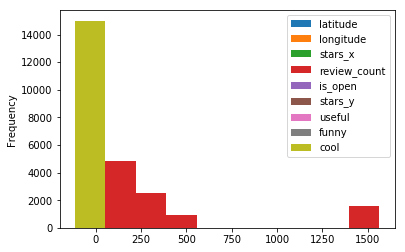

In [12]:
df.plot.hist()

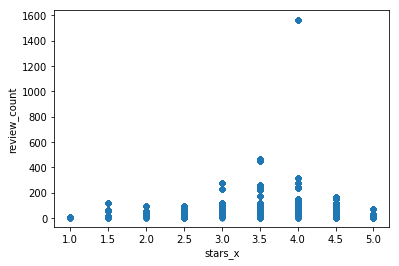

In [13]:
df.plot.scatter(x='stars_x',y='review_count')

In [14]:
df.count()

business_id     15000
name            15000
neighborhood     7616
address         14819
city            15000
state           15000
postal_code     15000
latitude        15000
longitude       15000
stars_x         15000
review_count    15000
is_open         15000
attributes      14190
categories      14993
hours           13535
review_id       15000
user_id         15000
stars_y         15000
date            15000
text            15000
useful          15000
funny           15000
cool            15000
dtype: int64

In [15]:
df=df[['business_id', 'city', 'state',  'review_count',  'text', 'useful', 'funny', 'cool','categories','stars_x']].copy()# add  'attributes' ,'is_open' after basic is done

In [16]:
df[['stars_x']].head()

,stars_x
0,4.0
1,4.0
2,4.0
3,4.0
4,4.0


In [17]:
df.shape

(15000, 10)

In [18]:
df.head()

,business_id,city,state,review_count,text,useful,funny,cool,categories,stars_x
0,Apn5Q_b6Nz61Tq4XzPdf9A,Calgary,AB,24,bGreat place Major flaw is how early it closes...,0,0,0,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",4.0
1,Apn5Q_b6Nz61Tq4XzPdf9A,Calgary,AB,24,bThe best fresh pizza and selection of micro b...,0,0,0,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",4.0
2,Apn5Q_b6Nz61Tq4XzPdf9A,Calgary,AB,24,bBought the Groupon for four people and pizza ...,0,0,0,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",4.0
3,Apn5Q_b6Nz61Tq4XzPdf9A,Calgary,AB,24,bWe went to Minhas with a coupon for a free pi...,4,1,2,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",4.0
4,Apn5Q_b6Nz61Tq4XzPdf9A,Calgary,AB,24,bMichael was an awesome tour guide Learned a l...,0,0,0,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",4.0


In [19]:
## What about categories of organizations
## How many categories in each organization? (minuimum 1, maximum 35 categories)
## Most frequent 2 categories
print(df['categories'].str.count(';').min() + 1, df['categories'].str.count(';').max() + 1)
(df['categories'].str.count(';') + 1).value_counts().head()

1.0 1.0


1.0    14993
Name: categories, dtype: int64

In [20]:
df['categories'].value_counts()

Poutineries, Restaurants, Diners                                                                                                1565
Pizza, Food, Restaurants                                                                                                         467
American (New), Restaurants, Food, Breweries, Brewpubs                                                                           446
Mexican, Restaurants                                                                                                             324
Restaurants, Bars, Nightlife, Caterers, Mexican, Tex-Mex, Event Planning & Services                                              312
Bars, Sports Bars, Dive Bars, Burgers, Nightlife, Sandwiches, Restaurants                                                        277
Casinos, Arts & Entertainment                                                                                                    275
Restaurants, Pizza                                                   

In [21]:
df['categories'].isna().values.any() #thus no blanks in catagory... isna() detect missing values

True

In [22]:
# the following sample code to group ALL the reviews for each business and create a new dataframe, where each line is a business with all its reviews.

df_review_agg = df.groupby('business_id')['text'].sum()  
 
df_ready_for_sklearn = pd.DataFrame({'business_id': df_review_agg.index, 'all_reviews': df_review_agg.values}) 

In [23]:
df_ready_for_sklearn.head()

,business_id,all_reviews
0,-0qqsy04kcYdXH3DOciaZw,bSo I just played all three of these courses e...
1,-26MGfikhJiTfCI-GqmzhQ,bCouldnt have asked for anything better Gary w...
2,-6aZNqhMoKfIz7rvkkRv7w,bcomparable prices quality products good varie...
3,-6uLOXdJFFCB9DtjIoBzFA,bMade a trip all the way to Pickering just to ...
4,-lBIxCbHxuN3YO_sUkWeUQ,bThese guys moved me last week The dropped and...


In [24]:
df.columns

Index(['business_id', 'city', 'state', 'review_count', 'text', 'useful',
       'funny', 'cool', 'categories', 'stars_x'],
      dtype='object')

# Text cleaning
Removal of punctuation ,digits,commas and making all lower case

In [25]:
df['text'].head(20)
df['text'].head(20)

0     bGreat place Major flaw is how early it closes...
1     bThe best fresh pizza and selection of micro b...
2     bBought the Groupon for four people and pizza ...
3     bWe went to Minhas with a coupon for a free pi...
4     bMichael was an awesome tour guide Learned a l...
5     bThis place is amazing We went in around pm no...
6     bWent for the tour and found was an awesome gu...
7     bIm a lightweight so I couldnt keep up with th...
8     bLast night we used our Groupon for  Pizzas  d...
9     bTHE BEST  Michael was awesome and I highly re...
10    bI love this place Good food and oh my gosh so...
11    bI was convinced that I would hate beer all my...
12    bVery cool tour of the brewery It was quite in...
13    bThe IPA put me offnnService was mediocre at b...
14    bThis was an awesome tour Our tour guide Micha...
15    bThis is a pizza restaurant and brewery They o...
16    bThis was my first brewery tour and Minhas has...
17    bWe had a very knowledgeable tour guide na

In [26]:

df["text"] = df['text'].str.replace('[^\w\s]','') # removing punctuations
df["text"] = df['text'].str.replace('\d+','') # removing digits 




In [27]:
df['text'].head(20)

0     bGreat place Major flaw is how early it closes...
1     bThe best fresh pizza and selection of micro b...
2     bBought the Groupon for four people and pizza ...
3     bWe went to Minhas with a coupon for a free pi...
4     bMichael was an awesome tour guide Learned a l...
5     bThis place is amazing We went in around pm no...
6     bWent for the tour and found was an awesome gu...
7     bIm a lightweight so I couldnt keep up with th...
8     bLast night we used our Groupon for  Pizzas  d...
9     bTHE BEST  Michael was awesome and I highly re...
10    bI love this place Good food and oh my gosh so...
11    bI was convinced that I would hate beer all my...
12    bVery cool tour of the brewery It was quite in...
13    bThe IPA put me offnnService was mediocre at b...
14    bThis was an awesome tour Our tour guide Micha...
15    bThis is a pizza restaurant and brewery They o...
16    bThis was my first brewery tour and Minhas has...
17    bWe had a very knowledgeable tour guide na

Above the effect of the Text Cleaning can bee seen

# TF-IDF Factorization of text coloumn

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(sublinear_tf=True, max_df=0.3,min_df=0.10,max_features=500, analyzer='word', stop_words='english', ngram_range =(1,3), use_idf = True)
x = v.fit_transform(df['text'])

In [29]:
x

<15000x30 sparse matrix of type '<class 'numpy.float64'>'
	with 68082 stored elements in Compressed Sparse Row format>

In [30]:
v

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.3, max_features=500, min_df=0.1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [31]:
df1 = pd.DataFrame(x.toarray(), columns=v.get_feature_names())


In [32]:
df.drop('text', axis=1, inplace=True)
df = pd.concat([df, df1], axis=1)

In [33]:
df.columns #these contains all columns previously selected previously

Index(['business_id', 'city', 'state', 'review_count', 'useful', 'funny',
       'cool', 'categories', 'stars_x', 'best', 'bi', 'came', 'come',
       'definitely', 'did', 'didnt', 'dont', 'experience', 'food', 'friendly',
       'going', 'got', 'great', 'im', 'just', 'like', 'little', 'love', 'make',
       'nice', 'order', 'ordered', 'people', 'really', 'service', 'staff',
       'time', 'try', 'went'],
      dtype='object')

In [34]:
df.head(2)

,business_id,city,state,review_count,useful,funny,cool,categories,stars_x,best,...,nice,order,ordered,people,really,service,staff,time,try,went
0,Apn5Q_b6Nz61Tq4XzPdf9A,Calgary,AB,24,0,0,0,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",4.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
1,Apn5Q_b6Nz61Tq4XzPdf9A,Calgary,AB,24,0,0,0,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",4.0,0.599182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481923,0.0,0.63932


### NORMALISATION OF "REVIEW COUNT"

In [35]:
#Normalisation of the dataframe
from sklearn import preprocessing

y = df[['review_count']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(y)
df['review_count'] = pd.DataFrame(x_scaled)

C:\Users\Gurudev\Anaconda3\envs\Tensorflowexclusive\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [36]:
df.head(2)

,business_id,city,state,review_count,useful,funny,cool,categories,stars_x,best,...,nice,order,ordered,people,really,service,staff,time,try,went
0,Apn5Q_b6Nz61Tq4XzPdf9A,Calgary,AB,0.013444,0,0,0,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",4.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
1,Apn5Q_b6Nz61Tq4XzPdf9A,Calgary,AB,0.013444,0,0,0,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",4.0,0.599182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481923,0.0,0.63932


In [39]:
df.head(2)

,business_id,city,state,review_count,useful,funny,cool,categories,stars_x,best,...,nice,order,ordered,people,really,service,staff,time,try,went
0,Apn5Q_b6Nz61Tq4XzPdf9A,Calgary,AB,0.013444,0,0,0,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",4.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
1,Apn5Q_b6Nz61Tq4XzPdf9A,Calgary,AB,0.013444,0,0,0,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",4.0,0.599182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481923,0.0,0.63932


In [40]:
df['stars_x'].unique()

array([4. , 4.5, 1.5, 2. , 2.5, 3.5, 1. , 5. , 3. ])

**Making 2 copies of dataframe . One for Linear regression Model and one for one for Rest**

In [43]:
dfo = df.copy() # for Other models 

In [44]:
dfl = df.copy() # for Linear Regression

In [45]:
#Add the features to remove
featurestoremove = {'business_id','categories','state','city'}
dfo= dfo[dfo.columns.difference(featurestoremove)]
dfl = dfl[dfl.columns.difference(featurestoremove)]

# Shuffling and splitting the data into Features and Labels 
dfo = dfo.sample(frac=1).reset_index(drop=True)
labelremove={'stars_x'}
labels =['stars_x']
dffeatures_x = dfo[dfo.columns.difference(labelremove)]

In [46]:
#Splitting for Regression
dffeatures_x_ne = dfl[dfl.columns.difference(labelremove)]
dflabel_y_ne = df[['stars_x']]

### Label Encoding of Target (Star Rating)

In [47]:
# Label Encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfo['stars_x'] = le.fit_transform(dfo['stars_x'] )

**Splitting the dataframe into Features and Labels dataframe**

In [48]:
#Adding the encoded labels to the dflabel_y
dflabel_y=dfo[labels]



In [49]:
dffeatures_x.shape


(15000, 34)

In [50]:
dflabel_y.head() # Label encoded for Catagorical Models

,stars_x
0,6
1,6
2,4
3,6
4,2


In [51]:
dflabel_y_ne.head() # For regression Models 

,stars_x
0,4.0
1,4.0
2,4.0
3,4.0
4,4.0


In [52]:
dffeatures_x_ne.shape  

(15000, 34)

In [56]:
dffeatures_x.columns

Index(['best', 'bi', 'came', 'come', 'cool', 'definitely', 'did', 'didnt',
       'dont', 'experience', 'food', 'friendly', 'funny', 'going', 'got',
       'great', 'im', 'just', 'like', 'little', 'love', 'make', 'nice',
       'order', 'ordered', 'people', 'really', 'review_count', 'service',
       'staff', 'time', 'try', 'useful', 'went'],
      dtype='object')

In [57]:
dffeatures_x['review_count'].head()

0    0.175416
1    0.198464
2    0.029449
3    0.092190
4    0.056978
Name: review_count, dtype: float64

In [58]:
dffeatures_x=dffeatures_x.fillna(0)
dflabel_y = dflabel_y.fillna(dflabel_y.mean())

In [59]:
dffeatures_x.head()

,best,bi,came,come,cool,definitely,did,didnt,dont,experience,...,ordered,people,really,review_count,service,staff,time,try,useful,went
0,0.38087,0.0,0.0,0.0,0,0.0,0.397441,0.394019,0.0,0.0,...,0.0,0.0,0.0,0.175416,0.0,0.377437,0.0,0.0,0,0.0
1,0.46878,0.0,0.0,0.0,0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.198464,0.0,0.464554,0.0,0.0,0,0.0
2,0.00000,0.0,0.0,0.0,0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.029449,0.0,0.000000,0.0,0.0,0,0.0
3,0.00000,0.0,0.0,0.0,0,0.0,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.092190,0.0,0.000000,0.0,0.0,1,0.0
4,0.00000,0.0,0.0,0.0,0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.056978,0.0,0.000000,0.0,0.0,30,0.0


# Splitting data to training and test

In [60]:
#splitting the data into training and testing set for all models except linear regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dffeatures_x, dflabel_y, test_size=0.33, random_state=42 ,shuffle=False)



#splitting for Linear regression model and regression neural network


X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(dffeatures_x_ne, dflabel_y_ne, test_size=0.33, random_state=42 ,shuffle=False)

In [61]:
X_test.head()

,best,bi,came,come,cool,definitely,did,didnt,dont,experience,...,ordered,people,really,review_count,service,staff,time,try,useful,went
10050,0.595102,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.093470,0.000000,0.000000,0.478641,0.0,0,0.0
10051,0.000000,0.000000,0.000000,0.0,0,0.000000,0.800365,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.056978,0.599513,0.000000,0.000000,0.0,1,0.0
10052,0.000000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.016005,0.403204,0.511194,0.000000,0.0,0,0.0
10053,0.000000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.385171,0.0,...,0.0,0.0,0.000000,0.065301,0.000000,0.000000,0.322926,0.0,0,0.0
10054,0.000000,0.424376,0.471226,0.0,0,0.480623,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.411377,0.041613,0.000000,0.444547,0.000000,0.0,0,0.0


**=========================================================================================================================**

#  Classical Machine Learning Models 

**=========================================================================================================================**

In [62]:
# Linear Regression to show true ratings of 5 businesses and the predicted ratings from model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
import numpy as np
clf  = LinearRegression()
clf.fit(X_train_n,y_train_n)
y_pred = clf.predict(X_test_n)


In [63]:

y_pred

array([[3.97623331],
       [3.51951824],
       [3.49982493],
       ...,
       [3.87375825],
       [3.58238338],
       [3.59981806]])

In [64]:
y_test_n.head()

,stars_x
10050,4.5
10051,4.5
10052,4.5
10053,2.0
10054,2.0


In [65]:
# Measure RMSE error.  RMSE is common for regression.
from sklearn import metrics
score = np.sqrt(metrics.mean_squared_error(y_pred,y_test_n))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.7285276374345943


In [66]:
#SVM to show true ratings of 5 businesses and the predicted ratings from model
from sklearn import svm
#logmodel=  svm.SVC(kernel='linear')
logmodel=  svm.SVC(C=1, kernel = 'linear', gamma=1, verbose= False, probability=False, random_state=42)
logmodel.fit(X_train, y_train.values.ravel())
y_predictval = logmodel.predict(X_test)

In [67]:
y_predictval

array([6, 5, 5, ..., 5, 5, 5], dtype=int64)

In [68]:
y_test.head()

,stars_x
10050,7
10051,2
10052,5
10053,6
10054,7


In [69]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_predictval))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        24
          1       0.00      0.00      0.00       101
          2       0.59      0.05      0.09       198
          3       0.00      0.00      0.00       279
          4       0.00      0.00      0.00       613
          5       0.29      0.71      0.42      1326
          6       0.48      0.52      0.50      1600
          7       0.00      0.00      0.00       618
          8       0.00      0.00      0.00       191

avg / total       0.26      0.36      0.28      4950



C:\Users\Gurudev\Anaconda3\envs\Tensorflowexclusive\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [70]:
#Logistic Regression to show true ratings of 5 businesses and the predicted ratings from model
from sklearn import linear_model 
from sklearn.metrics import classification_report
logmod = linear_model.LogisticRegression(C=1e5)
logmod.fit(X_train, y_train.values.ravel())
y_predval = logmod.predict(X_test)

In [71]:
y_predval

array([6, 5, 5, ..., 5, 6, 6], dtype=int64)

In [72]:
y_test.head()

,stars_x
10050,7
10051,2
10052,5
10053,6
10054,7


In [73]:
print(metrics.classification_report(y_test,y_predval))

             precision    recall  f1-score   support

          0       0.21      0.12      0.16        24
          1       1.00      0.01      0.02       101
          2       0.27      0.10      0.14       198
          3       0.20      0.01      0.02       279
          4       0.18      0.04      0.07       613
          5       0.28      0.46      0.34      1326
          6       0.46      0.61      0.52      1600
          7       0.29      0.14      0.18       618
          8       0.29      0.16      0.21       191

avg / total       0.34      0.35      0.31      4950



In [74]:
#KNN to show true ratings of 5 businesses and the predicted ratings from model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train.values.ravel())
y_pv = neigh.predict(X_test)

In [75]:
y_pv

array([5, 8, 6, ..., 4, 4, 5], dtype=int64)

In [76]:
y_test.head()

,stars_x
10050,7
10051,2
10052,5
10053,6
10054,7


In [77]:
print(metrics.classification_report(y_test,y_pv))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        24
          1       0.08      0.14      0.10       101
          2       0.13      0.12      0.13       198
          3       0.08      0.07      0.07       279
          4       0.16      0.18      0.17       613
          5       0.35      0.39      0.37      1326
          6       0.48      0.50      0.49      1600
          7       0.18      0.11      0.14       618
          8       0.15      0.06      0.09       191

avg / total       0.31      0.32      0.31      4950



In [78]:
#Multinomial Naive Bayes to show true ratings of 5 businesses and the predicted ratings from model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train.values.ravel())
y_preds = nb.predict(X_test)

In [79]:
y_preds

array([6, 5, 5, ..., 5, 6, 6], dtype=int64)

In [80]:
y_test.head()

,stars_x
10050,7
10051,2
10052,5
10053,6
10054,7


In [81]:
print(metrics.classification_report(y_test,y_preds))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        24
          1       0.00      0.00      0.00       101
          2       0.15      0.14      0.15       198
          3       0.00      0.00      0.00       279
          4       0.16      0.04      0.06       613
          5       0.26      0.24      0.25      1326
          6       0.38      0.80      0.52      1600
          7       0.34      0.03      0.06       618
          8       0.00      0.00      0.00       191

avg / total       0.26      0.34      0.25      4950



C:\Users\Gurudev\Anaconda3\envs\Tensorflowexclusive\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**=========================================================================================================================**


# Neural Network Models 

**=========================================================================================================================**

In [82]:
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os

***Task 1:  Consider this problem as a regression problem. Compare the RMSE of the BEST Tensorflow regression neural network model. ***





In [1042]:
print("shape of training features x and y ",X_train_n.shape, y_train_n.shape)
print("shape of Test features x and y ",X_test_n.shape, y_test_n.shape)

shape of training features x and y  (10050, 34) (10050, 1)
shape of Test features x and y  (4950, 34) (4950, 1)


In [1043]:
X_train_n = X_train_n.fillna(X_train_n.mean() )
y_train_n = y_train_n.fillna(y_train_n.mean() )
X_test_n = X_test_n.fillna(X_test_n.mean())
y_test_n = y_test_n.fillna(y_test_n.mean() )

In [1044]:
import pandas as pd
import tensorflow as tf
import numpy as np
import keras
from keras.optimizers import SGD
from keras import regularizers
from keras.layers import Dense, Dropout
from keras import metrics
import sklearn as sk
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.layers import LeakyReLU

In [1045]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

**Neural network Model which  implements Linear Regression Model 1**

In [1046]:
checkpointer = ModelCheckpoint(filepath="best_weights1.hdf5", verbose=0, save_best_only=True)
for i in range(5):
########################################################################################################################
    model0 = Sequential()
    model0.add(Dense(10, input_dim=dffeatures_x.shape[1], activation='relu', kernel_initializer = 'normal'))
    model0.add(Dense(15,activation='relu'))
    model0.add(Dense(dflabel_y.shape[1],activation='relu'))
    model0.compile(loss='mean_squared_error', optimizer= keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=['mse'])
#model0.compile(loss=root_mean_squared_error(y_test_n, y_pred), optimizer= tf.train.AdamOptimizer(),metrics=['mse','accuracy'])

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, verbose=2, mode='auto')  
    model0.fit(X_train_n, y_train_n, validation_data=(X_test_n,y_test_n), callbacks=[monitor,checkpointer],verbose=2,epochs=10, batch_size = 100) 
#########################################################################################################################
print('Training finished...Loading the best model')  
print()
model0.load_weights("best_weights1.hdf5") # load weights from best model

# Measure accuracy
pred = model0.predict(X_test_n)
#pred = np.argmax(pred,axis=1)
score = sk.metrics.mean_squared_error(y_test_n, pred)
print(score)
print("Final mean_squared_error: {}".format(score))

Train on 10050 samples, validate on 4950 samples
Epoch 1/10
 - 15s - loss: 9.2014 - mean_squared_error: 9.2014 - val_loss: 3.4709 - val_mean_squared_error: 3.4709
Epoch 2/10
 - 1s - loss: 1.2701 - mean_squared_error: 1.2701 - val_loss: 0.8625 - val_mean_squared_error: 0.8625
Epoch 3/10
 - 0s - loss: 0.7522 - mean_squared_error: 0.7522 - val_loss: 0.7423 - val_mean_squared_error: 0.7423
Epoch 4/10
 - 1s - loss: 0.6534 - mean_squared_error: 0.6534 - val_loss: 0.6654 - val_mean_squared_error: 0.6654
Epoch 5/10
 - 1s - loss: 0.5849 - mean_squared_error: 0.5849 - val_loss: 0.6061 - val_mean_squared_error: 0.6061
Epoch 6/10
 - 0s - loss: 0.5350 - mean_squared_error: 0.5350 - val_loss: 0.5664 - val_mean_squared_error: 0.5664
Epoch 7/10
 - 0s - loss: 0.5065 - mean_squared_error: 0.5065 - val_loss: 0.5425 - val_mean_squared_error: 0.5425
Epoch 8/10
 - 0s - loss: 0.4959 - mean_squared_error: 0.4959 - val_loss: 0.5485 - val_mean_squared_error: 0.5485
Epoch 9/10
 - 0s - loss: 0.4888 - mean_squared

In [1047]:
print(model0.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_544 (Dense)            (None, 10)                350       
_________________________________________________________________
dense_545 (Dense)            (None, 15)                165       
_________________________________________________________________
dense_546 (Dense)            (None, 1)                 16        
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________
None


**Neural network Model which  implements Linear Regression Model 2**

In [1048]:
checkpointer1 = ModelCheckpoint(filepath="best_weights2.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(5):
########################################################################################################################
    model1 = Sequential()
    model1.add(Dense(20, input_dim=dffeatures_x.shape[1], activation='tanh'))
    model1.add(Dense(10,activation='tanh')) #tanh Activation Function Used
    #model1.add(Dense(dflabel_y.shape[1],activation='relu'))
    model1.add(Dense(dflabel_y.shape[1]))
    model1.add(LeakyReLU(alpha=0.1))
    model1.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) ,metrics=['mse','accuracy'])
    monitor1 = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, verbose=2, mode='auto')  
# patience: number of epochs with no improvement after which training will be stopped
    model1.fit(X_train_n, y_train_n, validation_data=(X_test_n,y_test_n), callbacks=[monitor1,checkpointer1],verbose=2,epochs=100)
#########################################################################################################################
print('Training finished...Loading the best model')  
print()
model1.load_weights("best_weights2.hdf5") # load weights from best model
# Measure accuracy
pred1 = model1.predict(X_test_n)
score = sk.metrics.mean_squared_error(y_test_n, pred1)
print(score)
print("Final mean_squared_error: {}".format(score))


Train on 10050 samples, validate on 4950 samples
Epoch 1/100
 - 6s - loss: 3.3155 - mean_squared_error: 3.3155 - acc: 0.1762 - val_loss: 0.7071 - val_mean_squared_error: 0.7071 - val_acc: 0.1299
Epoch 2/100
 - 2s - loss: 0.6120 - mean_squared_error: 0.6120 - acc: 0.3818 - val_loss: 0.6498 - val_mean_squared_error: 0.6498 - val_acc: 0.1301
Epoch 3/100
 - 1s - loss: 0.5730 - mean_squared_error: 0.5730 - acc: 0.3968 - val_loss: 0.6051 - val_mean_squared_error: 0.6051 - val_acc: 0.1329
Epoch 4/100
 - 1s - loss: 0.5316 - mean_squared_error: 0.5316 - acc: 0.4044 - val_loss: 0.5642 - val_mean_squared_error: 0.5642 - val_acc: 0.1457
Epoch 5/100
 - 2s - loss: 0.4986 - mean_squared_error: 0.4986 - acc: 0.4053 - val_loss: 0.5515 - val_mean_squared_error: 0.5515 - val_acc: 0.1493
Epoch 6/100
 - 2s - loss: 0.4781 - mean_squared_error: 0.4781 - acc: 0.4035 - val_loss: 0.5297 - val_mean_squared_error: 0.5297 - val_acc: 0.1552
Epoch 7/100
 - 2s - loss: 0.4700 - mean_squared_error: 0.4700 - acc: 0.4062

Epoch 27/100
 - 1s - loss: 0.4424 - mean_squared_error: 0.4424 - acc: 0.4260 - val_loss: 0.5237 - val_mean_squared_error: 0.5237 - val_acc: 0.1552
Epoch 28/100
 - 1s - loss: 0.4430 - mean_squared_error: 0.4430 - acc: 0.4266 - val_loss: 0.5162 - val_mean_squared_error: 0.5162 - val_acc: 0.1545
Epoch 29/100
 - 1s - loss: 0.4409 - mean_squared_error: 0.4409 - acc: 0.4272 - val_loss: 0.5132 - val_mean_squared_error: 0.5132 - val_acc: 0.1535
Epoch 30/100
 - 1s - loss: 0.4419 - mean_squared_error: 0.4419 - acc: 0.4258 - val_loss: 0.5203 - val_mean_squared_error: 0.5203 - val_acc: 0.1543
Epoch 31/100
 - 1s - loss: 0.4407 - mean_squared_error: 0.4407 - acc: 0.4248 - val_loss: 0.5233 - val_mean_squared_error: 0.5233 - val_acc: 0.1525
Epoch 32/100
 - 1s - loss: 0.4399 - mean_squared_error: 0.4399 - acc: 0.4277 - val_loss: 0.5186 - val_mean_squared_error: 0.5186 - val_acc: 0.1525
Epoch 33/100
 - 1s - loss: 0.4395 - mean_squared_error: 0.4395 - acc: 0.4256 - val_loss: 0.5172 - val_mean_squared_err

Epoch 19/100
 - 2s - loss: 0.4537 - mean_squared_error: 0.4537 - acc: 0.4206 - val_loss: 0.5378 - val_mean_squared_error: 0.5378 - val_acc: 0.1505
Epoch 20/100
 - 1s - loss: 0.4525 - mean_squared_error: 0.4525 - acc: 0.4207 - val_loss: 0.5231 - val_mean_squared_error: 0.5231 - val_acc: 0.1562
Epoch 21/100
 - 1s - loss: 0.4513 - mean_squared_error: 0.4513 - acc: 0.4203 - val_loss: 0.5363 - val_mean_squared_error: 0.5363 - val_acc: 0.1489
Epoch 22/100
 - 2s - loss: 0.4517 - mean_squared_error: 0.4517 - acc: 0.4217 - val_loss: 0.5357 - val_mean_squared_error: 0.5357 - val_acc: 0.1513
Epoch 23/100
 - 2s - loss: 0.4506 - mean_squared_error: 0.4506 - acc: 0.4237 - val_loss: 0.5336 - val_mean_squared_error: 0.5336 - val_acc: 0.1485
Epoch 24/100
 - 1s - loss: 0.4504 - mean_squared_error: 0.4504 - acc: 0.4219 - val_loss: 0.5296 - val_mean_squared_error: 0.5296 - val_acc: 0.1509
Epoch 25/100
 - 2s - loss: 0.4497 - mean_squared_error: 0.4497 - acc: 0.4219 - val_loss: 0.5328 - val_mean_squared_err

Epoch 46/100
 - 2s - loss: 0.4336 - mean_squared_error: 0.4336 - acc: 0.4318 - val_loss: 0.5217 - val_mean_squared_error: 0.5217 - val_acc: 0.1491
Epoch 47/100
 - 1s - loss: 0.4332 - mean_squared_error: 0.4332 - acc: 0.4313 - val_loss: 0.5117 - val_mean_squared_error: 0.5117 - val_acc: 0.1541
Epoch 48/100
 - 1s - loss: 0.4330 - mean_squared_error: 0.4330 - acc: 0.4316 - val_loss: 0.5252 - val_mean_squared_error: 0.5252 - val_acc: 0.1517
Epoch 49/100
 - 1s - loss: 0.4332 - mean_squared_error: 0.4332 - acc: 0.4297 - val_loss: 0.5211 - val_mean_squared_error: 0.5211 - val_acc: 0.1481
Epoch 50/100
 - 2s - loss: 0.4322 - mean_squared_error: 0.4322 - acc: 0.4311 - val_loss: 0.5154 - val_mean_squared_error: 0.5154 - val_acc: 0.1531
Epoch 51/100
 - 1s - loss: 0.4322 - mean_squared_error: 0.4322 - acc: 0.4308 - val_loss: 0.5134 - val_mean_squared_error: 0.5134 - val_acc: 0.1570
Epoch 52/100
 - 1s - loss: 0.4325 - mean_squared_error: 0.4325 - acc: 0.4317 - val_loss: 0.5274 - val_mean_squared_err

In [1049]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_559 (Dense)            (None, 20)                700       
_________________________________________________________________
dense_560 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_561 (Dense)            (None, 1)                 11        
_________________________________________________________________
leaky_re_lu_68 (LeakyReLU)   (None, 1)                 0         
Total params: 921
Trainable params: 921
Non-trainable params: 0
_________________________________________________________________


In [1050]:
pred = model1.predict(X_test_n)
print(pred) # print predictions

[[3.8402147]
 [3.6953278]
 [3.5868654]
 ...
 [3.8170156]
 [3.6548662]
 [3.5807843]]


**/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////**

***Task 2:  Consider this problem as a classification problem. Compare the accuracy of the BEST Tensorflow classification neural network model ***

**Neural network Model which  implements Classification Model 1**

In [1051]:
from keras.utils import to_categorical
y_binary_test = to_categorical(y_test)
y_binary_train = to_categorical(y_train)

In [1052]:
y_binary_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [1053]:
y_binary_test .shape[1]

9

In [1055]:
checkpoint = ModelCheckpoint(filepath="best_weights3.hdf5", verbose=0, save_best_only=True,mode='max') # save best model
for i in range(5):
########################################################################################################################
    model = Sequential()
    model.add(Dense(20, input_shape=(34,), activation='relu'))
    model.add(Dense(5,activation='relu'))
    model.add(Dense(y_binary_test.shape[1],activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=[metrics.mae, metrics.categorical_accuracy])
    monitor2 = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, verbose=2, mode='auto')  
    # patience: number of epochs with no improvement after which training will be stopped
    # The test set is checked during training to monitor progress for early stopping but is never used for gradient descent (model training)
    callbacks_list = [monitor2,checkpoint]
    model.fit(X_train, y_binary_train, validation_data=(X_test,y_binary_test), callbacks=callbacks_list, verbose=2,batch_size=32, epochs=100)
##########################################################################################################################

print('Training finished...Loading the best model')  
print()
model.load_weights("best_weights3.hdf5") # load weights from best model

# Measure accuracy
pred2 = model.predict(X_test)
pred2 = np.argmax(pred2,axis=1)
y_true = np.argmax(y_test,axis=1)
score = sk.metrics.accuracy_score(y_test, pred2)
print("Final accuracy: {}".format(score))


Train on 10050 samples, validate on 4950 samples
Epoch 1/100
 - 8s - loss: 1.8826 - mean_absolute_error: 0.1809 - categorical_accuracy: 0.3041 - val_loss: 1.7298 - val_mean_absolute_error: 0.1705 - val_categorical_accuracy: 0.3297
Epoch 2/100
 - 1s - loss: 1.6628 - mean_absolute_error: 0.1661 - categorical_accuracy: 0.3431 - val_loss: 1.6464 - val_mean_absolute_error: 0.1643 - val_categorical_accuracy: 0.3412
Epoch 3/100
 - 1s - loss: 1.6029 - mean_absolute_error: 0.1610 - categorical_accuracy: 0.3560 - val_loss: 1.6106 - val_mean_absolute_error: 0.1616 - val_categorical_accuracy: 0.3370
Epoch 4/100
 - 1s - loss: 1.5714 - mean_absolute_error: 0.1585 - categorical_accuracy: 0.3556 - val_loss: 1.5843 - val_mean_absolute_error: 0.1600 - val_categorical_accuracy: 0.3370
Epoch 5/100
 - 1s - loss: 1.5440 - mean_absolute_error: 0.1571 - categorical_accuracy: 0.3559 - val_loss: 1.5645 - val_mean_absolute_error: 0.1581 - val_categorical_accuracy: 0.3333
Epoch 6/100
 - 2s - loss: 1.5231 - mean_a

Epoch 46/100
 - 1s - loss: 1.3848 - mean_absolute_error: 0.1451 - categorical_accuracy: 0.4319 - val_loss: 1.4438 - val_mean_absolute_error: 0.1491 - val_categorical_accuracy: 0.3915
Epoch 47/100
 - 1s - loss: 1.3824 - mean_absolute_error: 0.1451 - categorical_accuracy: 0.4296 - val_loss: 1.4433 - val_mean_absolute_error: 0.1494 - val_categorical_accuracy: 0.3897
Epoch 48/100
 - 1s - loss: 1.3833 - mean_absolute_error: 0.1451 - categorical_accuracy: 0.4295 - val_loss: 1.4473 - val_mean_absolute_error: 0.1497 - val_categorical_accuracy: 0.3891
Epoch 49/100
 - 1s - loss: 1.3825 - mean_absolute_error: 0.1451 - categorical_accuracy: 0.4286 - val_loss: 1.4433 - val_mean_absolute_error: 0.1484 - val_categorical_accuracy: 0.3992
Epoch 50/100
 - 1s - loss: 1.3816 - mean_absolute_error: 0.1449 - categorical_accuracy: 0.4302 - val_loss: 1.4415 - val_mean_absolute_error: 0.1488 - val_categorical_accuracy: 0.3909
Epoch 51/100
 - 1s - loss: 1.3818 - mean_absolute_error: 0.1449 - categorical_accurac

Epoch 32/100
 - 1s - loss: 1.3836 - mean_absolute_error: 0.1450 - categorical_accuracy: 0.4204 - val_loss: 1.4395 - val_mean_absolute_error: 0.1480 - val_categorical_accuracy: 0.3915
Epoch 33/100
 - 1s - loss: 1.3840 - mean_absolute_error: 0.1453 - categorical_accuracy: 0.4199 - val_loss: 1.4378 - val_mean_absolute_error: 0.1472 - val_categorical_accuracy: 0.3943
Epoch 34/100
 - 1s - loss: 1.3837 - mean_absolute_error: 0.1451 - categorical_accuracy: 0.4200 - val_loss: 1.4359 - val_mean_absolute_error: 0.1484 - val_categorical_accuracy: 0.3943
Epoch 35/100
 - 1s - loss: 1.3823 - mean_absolute_error: 0.1450 - categorical_accuracy: 0.4199 - val_loss: 1.4423 - val_mean_absolute_error: 0.1471 - val_categorical_accuracy: 0.3939
Epoch 36/100
 - 1s - loss: 1.3817 - mean_absolute_error: 0.1450 - categorical_accuracy: 0.4192 - val_loss: 1.4334 - val_mean_absolute_error: 0.1485 - val_categorical_accuracy: 0.3909
Epoch 37/100
 - 2s - loss: 1.3817 - mean_absolute_error: 0.1449 - categorical_accurac

Epoch 29/100
 - 1s - loss: 1.3725 - mean_absolute_error: 0.1442 - categorical_accuracy: 0.4167 - val_loss: 1.4114 - val_mean_absolute_error: 0.1470 - val_categorical_accuracy: 0.3988
Epoch 30/100
 - 1s - loss: 1.3714 - mean_absolute_error: 0.1441 - categorical_accuracy: 0.4203 - val_loss: 1.4135 - val_mean_absolute_error: 0.1460 - val_categorical_accuracy: 0.3988
Epoch 31/100
 - 2s - loss: 1.3678 - mean_absolute_error: 0.1438 - categorical_accuracy: 0.4203 - val_loss: 1.4110 - val_mean_absolute_error: 0.1460 - val_categorical_accuracy: 0.4026
Epoch 32/100
 - 2s - loss: 1.3674 - mean_absolute_error: 0.1439 - categorical_accuracy: 0.4174 - val_loss: 1.4088 - val_mean_absolute_error: 0.1466 - val_categorical_accuracy: 0.3966
Epoch 33/100
 - 1s - loss: 1.3658 - mean_absolute_error: 0.1438 - categorical_accuracy: 0.4213 - val_loss: 1.4084 - val_mean_absolute_error: 0.1470 - val_categorical_accuracy: 0.3933
Epoch 34/100
 - 1s - loss: 1.3644 - mean_absolute_error: 0.1437 - categorical_accurac

Epoch 00073: early stopping
Train on 10050 samples, validate on 4950 samples
Epoch 1/100
 - 5s - loss: 1.8309 - mean_absolute_error: 0.1776 - categorical_accuracy: 0.3265 - val_loss: 1.6898 - val_mean_absolute_error: 0.1686 - val_categorical_accuracy: 0.3248
Epoch 2/100
 - 1s - loss: 1.6273 - mean_absolute_error: 0.1644 - categorical_accuracy: 0.3319 - val_loss: 1.6156 - val_mean_absolute_error: 0.1624 - val_categorical_accuracy: 0.3230
Epoch 3/100
 - 1s - loss: 1.5704 - mean_absolute_error: 0.1596 - categorical_accuracy: 0.3375 - val_loss: 1.5760 - val_mean_absolute_error: 0.1597 - val_categorical_accuracy: 0.3251
Epoch 4/100
 - 1s - loss: 1.5369 - mean_absolute_error: 0.1570 - categorical_accuracy: 0.3415 - val_loss: 1.5440 - val_mean_absolute_error: 0.1584 - val_categorical_accuracy: 0.3354
Epoch 5/100
 - 1s - loss: 1.5080 - mean_absolute_error: 0.1553 - categorical_accuracy: 0.3568 - val_loss: 1.5166 - val_mean_absolute_error: 0.1556 - val_categorical_accuracy: 0.3410
Epoch 6/100
 

Epoch 46/100
 - 1s - loss: 1.3792 - mean_absolute_error: 0.1449 - categorical_accuracy: 0.4187 - val_loss: 1.4425 - val_mean_absolute_error: 0.1480 - val_categorical_accuracy: 0.3943
Epoch 00046: early stopping
Train on 10050 samples, validate on 4950 samples
Epoch 1/100
 - 5s - loss: 2.1277 - mean_absolute_error: 0.1950 - categorical_accuracy: 0.2929 - val_loss: 2.0186 - val_mean_absolute_error: 0.1922 - val_categorical_accuracy: 0.3287
Epoch 2/100
 - 1s - loss: 1.9547 - mean_absolute_error: 0.1896 - categorical_accuracy: 0.3293 - val_loss: 1.9081 - val_mean_absolute_error: 0.1874 - val_categorical_accuracy: 0.3279
Epoch 3/100
 - 1s - loss: 1.8308 - mean_absolute_error: 0.1821 - categorical_accuracy: 0.3300 - val_loss: 1.7453 - val_mean_absolute_error: 0.1732 - val_categorical_accuracy: 0.3267
Epoch 4/100
 - 1s - loss: 1.6756 - mean_absolute_error: 0.1663 - categorical_accuracy: 0.3343 - val_loss: 1.6623 - val_mean_absolute_error: 0.1647 - val_categorical_accuracy: 0.3107
Epoch 5/100


Epoch 45/100
 - 1s - loss: 1.3827 - mean_absolute_error: 0.1451 - categorical_accuracy: 0.4202 - val_loss: 1.4365 - val_mean_absolute_error: 0.1483 - val_categorical_accuracy: 0.3929
Epoch 46/100
 - 1s - loss: 1.3819 - mean_absolute_error: 0.1451 - categorical_accuracy: 0.4209 - val_loss: 1.4358 - val_mean_absolute_error: 0.1480 - val_categorical_accuracy: 0.3907
Epoch 47/100
 - 1s - loss: 1.3818 - mean_absolute_error: 0.1450 - categorical_accuracy: 0.4188 - val_loss: 1.4347 - val_mean_absolute_error: 0.1485 - val_categorical_accuracy: 0.3998
Epoch 48/100
 - 2s - loss: 1.3809 - mean_absolute_error: 0.1450 - categorical_accuracy: 0.4214 - val_loss: 1.4346 - val_mean_absolute_error: 0.1483 - val_categorical_accuracy: 0.3988
Epoch 49/100
 - 1s - loss: 1.3822 - mean_absolute_error: 0.1451 - categorical_accuracy: 0.4193 - val_loss: 1.4391 - val_mean_absolute_error: 0.1478 - val_categorical_accuracy: 0.3911
Epoch 50/100
 - 1s - loss: 1.3824 - mean_absolute_error: 0.1450 - categorical_accurac

In [ ]:
y_binary_test

In [ ]:
model.summary()

In [ ]:
predc = model.predict(X_test)
print(predc) # print  predictions

**Neural network Model which  implements Classification Model 2**

In [ ]:
checkpoints = ModelCheckpoint(filepath="best_weights4.hdf5", verbose=0, save_best_only=True,mode='max') # save best model
for i in range(5):
########################################################################################################################
    models = Sequential()
    models.add(Dense(20, input_shape=(152,), activation='relu'))
    models.add(Dense(15,activation='relu'))
    models.add(Dense(15,activation='tanh'))
    model.add(Dense(15, 
                kernel_regularizer=regularizers.l1(0.01),
                activity_regularizer=regularizers.l2(0.01), activation='relu'))
    models.add(Dropout(0.5))
    models.add(Dense(15,activation= 'relu'))
    models.add(Dense(y_binary_test.shape[1],activation='sigmoid'))
    sgd = SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False)
    models.compile(loss='categorical_crossentropy', optimizer= sgd ,metrics=[metrics.mae, metrics.categorical_accuracy])
    monitors = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, verbose=2, mode='auto')  
    # The test set is checked during training to monitor progress for early stopping but is never used for gradient descent (model training)
    callbacks_list = [monitors,checkpoints]
    models.fit(X_train, y_binary_train, validation_data=(X_test,y_binary_test), callbacks=callbacks_list, verbose=2,batch_size=32, epochs=100)
    models.load_weights("best_weights4.hdf5")
##########################################################################################################################
print('Training finished...Loading the best model')  
print()
models.load_weights("best_weights4.hdf5") # load weights from best model

# Measure accuracy
pred3 = models.predict(X_test)
pred3 = np.argmax(pred3,axis=1)
#y_true = np.argmax(y_test,axis=1)
score = sk.metrics.accuracy_score(y_test, pred3)
print("Final accuracy: {}".format(score))



In [ ]:
models.summary()

In [ ]:
predc = models.predict(X_test)
print(predc) # print predictions

**Neural network Model which  implements Classification Model 3**

In [ ]:
import keras as kp
# Define ModelCheckpoint outside the loop
checkpoint3 = ModelCheckpoint(filepath="best_weights5.hdf5", verbose=0, save_best_only=True,mode='max') # save best model
for i in range(1):
########################################################################################################################
    model3 = Sequential()
    model3.add(Dense(20, input_shape=(152,), activation='relu'))
    model3.add(Dense(15,activation='relu' ))
    model3.add(Dense(100))
    model3.add(LeakyReLU(alpha=0.1))
    model3.add(Dense(100))
    model3.add(LeakyReLU(alpha=0.1)) ##Leaky Relu
    model3.add(Dense(20,activation= 'relu' ))
    # Regularisation Through Drop Out 
    model3.add(Dense(15,activation='tanh'))
    model3.add(Dense(15, 
                kernel_regularizer=regularizers.l1(0.01),
                activity_regularizer=regularizers.l2(0.01), activation='relu'))
    model3.add(Dropout(0.25))
    model3.add(Dense(15,activation= 'relu'))
    model3.add(Dense(y_binary_test.shape[1],activation='sigmoid'))
    rms = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model3.compile(loss='categorical_crossentropy', optimizer= rms ,metrics=[kp.metrics.mae, kp.metrics.categorical_accuracy])
    monitor3 = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, verbose=2, mode='auto')  
# The test set is checked during training to monitor progress for early stopping but is never used for gradient descent (model training)
#checkpoint3 = ModelCheckpoint(filepath="best_weights5.hdf5", verbose=0, save_best_only=True,mode='max') # save best model
    callbacks_list = [monitor3,checkpoint3]
    model3.fit(X_train, y_binary_train, validation_data=(X_test,y_binary_test), callbacks=callbacks_list, verbose=2,batch_size=32, epochs=200)
##########################################################################################################################



In [ ]:
model3.summary()

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

# Accuracy Comparision

**xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx**

**Task 1 Accuracy comparison**

**Accuracy of Classical Machine Learning Model (Linear Regression)**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
score = np.sqrt(sk.metrics.mean_squared_error(y_pred,y_test_n))
print("Final score (RMSE): {}".format(score))

In [ ]:
import math
print("RMSE of Neural network model: ",math.sqrt(12.883383838383839))

**Task 2 Accuracy Comparison**

**Classic SVM model accuracy**

In [ ]:

print(sk.metrics.classification_report(y_test,y_predictval))

In [ ]:
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[  0   0   0   0   0  21   6   0   0]
 [  0   0   2   0   0  95  26   0   0]
 [  0   0   8   0   0 135  32   0   0]
 [  0   0   1   0   0 191  56   0   0]
 [  0   0   1   0   0 496 156   0   0]
 [  0   0   1   0   0 910 435   0   0]
 [  0   0   1   0   0 740 883   0   0]
 [  0   0   0   0   0 350 220   0   0]
 [  0   0   0   0   0 108  76   0   0]]
Plotting confusion matrix


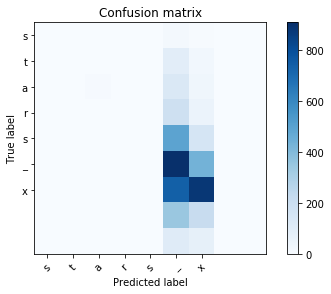

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        27
          1       0.00      0.00      0.00       123
          2       0.57      0.05      0.08       175
          3       0.00      0.00      0.00       248
          4       0.00      0.00      0.00       653
          5       0.30      0.68      0.41      1346
          6       0.47      0.54      0.50      1624
          7       0.00      0.00      0.00       570
          8       0.00      0.00      0.00       184

avg / total       0.25      0.36      0.28      4950



C:\Users\Gurudev\Anaconda3\envs\Giithub Program Test\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [956]:


# Compute confusion matrix
cm = confusion_matrix(y_test,y_predictval)
print(cm)
print('Plotting confusion matrix')
diagnosis= 'stars_x'
plt.figure()
plot_confusion_matrix(cm, diagnosis)
plt.show()
print(classification_report(y_test,y_predictval))

** Classic Logistic regression accuracy**

In [957]:
print(sk.metrics.classification_report(y_test,y_predval))

             precision    recall  f1-score   support

          0       0.27      0.11      0.16        27
          1       0.00      0.00      0.00       123
          2       0.14      0.06      0.09       175
          3       0.18      0.01      0.02       248
          4       0.12      0.02      0.03       653
          5       0.27      0.43      0.33      1346
          6       0.45      0.59      0.51      1624
          7       0.25      0.17      0.20       570
          8       0.29      0.16      0.21       184

avg / total       0.29      0.34      0.30      4950



C:\Users\Gurudev\Anaconda3\envs\Giithub Program Test\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Classic KNN model Accuracy**

In [ ]:
print(sk.metrics.classification_report(y_test,y_pv))

**Classic Multinomial Naive Bayes model accuracy**

In [ ]:
print(sk.metrics.classification_report(y_test,y_preds))

**Neural network Model accuracy which implements best Classification model 1** 

In [ ]:
print(" Neural network Model Accuracy: val_categorical_accuracy: 0.52 ")